In [42]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 운영 체제 정보를 확인하고, matplotlib을 사용하여 그래프 그릴 준비하기
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Sorry')

plt.rcParams['axes.unicode_minus'] = False

In [43]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0) # iris-setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # 두 꽃에 대한 예측은 True / False
y_pred

array([ True, False])

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

print(y_pred)
print(rmse)

[1.28463736 2.3567012  1.37453837 ... 2.00380092 1.63780066 1.98379911]
0.5053326657968172


In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

In [46]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

# 1. 데이터 로드 및 분할
iris = load_iris()
X = iris['data']
y = iris['target']

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 2. 모델 생성 및 학습
mlp_clf = MLPClassifier(hidden_layer_sizes=[10, 10], random_state=42, max_iter=500)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)

# 3. 확률 예측값 생성
y_proba = pipeline.predict_proba(X_test)

# 4. 크로스 엔트로피 계산
cross_entropy_loss = log_loss(y_test, y_proba)
print(f"Cross-Entropy Loss: {cross_entropy_loss:.4f}")

Cross-Entropy Loss: 0.0554


In [47]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# 1. 데이터 로드
iris = load_iris(as_frame=True)
X = iris['data']
y = iris['target']

# 2. 데이터 분할 (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. 모델 생성 (전처리 포함)
mlp_clf = MLPClassifier(hidden_layer_sizes=[10, 10, 10], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)

# 4. 모델 학습
pipeline.fit(X_train, y_train)

# 5. 예측 및 결과 평가
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.64      0.78        11
           2       0.75      1.00      0.86        12

    accuracy                           0.89        38
   macro avg       0.92      0.88      0.88        38
weighted avg       0.92      0.89      0.89        38



In [48]:
# 하이퍼 파라미터 보완
mlp_clf = MLPClassifier(hidden_layer_sizes=[10, 10, 10], random_state=42, max_iter=500, learning_rate_init=0.01)
pipeline = make_pipeline(StandardScaler(), mlp_clf)

# 4. 모델 학습
pipeline.fit(X_train, y_train)

# 5. 예측 및 결과 평가
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


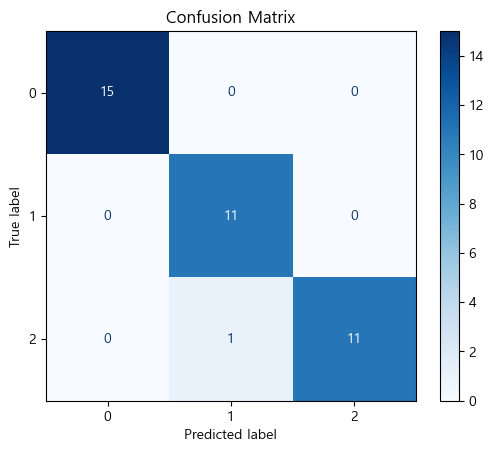

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [51]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
print(X_train.shape)
print(X_train.dtype)

(55000, 28, 28)
uint8


In [52]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 훈련 세트에 있는 첫 번째 이미지의 레이블 확인
class_names[y_train[0]]

'Ankle boot'

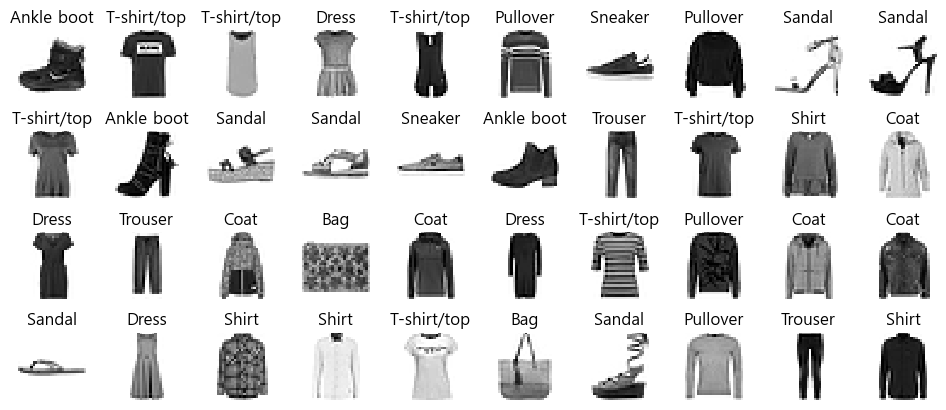

In [54]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [55]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [56]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델에 있는 모든 층 출력
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>]

In [58]:
hidden1 = model.layers[1]
hidden1.name

'dense_8'

In [59]:
model.get_layer('dense') is hidden1

ValueError: No such layer: dense. Existing layers are: ['flatten_2', 'dense_8', 'dense_9', 'dense_10'].

In [60]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06904554,  0.02174404, -0.04068753, ...,  0.0109205 ,
         0.03848091,  0.03013358],
       [ 0.0110154 ,  0.0337771 ,  0.00120068, ...,  0.03503232,
         0.04679741, -0.06399959],
       [ 0.02024434,  0.07194787, -0.06121028, ..., -0.05605707,
         0.06145084, -0.06960637],
       ...,
       [ 0.06463142,  0.07200339,  0.01092591, ..., -0.05216845,
        -0.0324687 , -0.02698069],
       [-0.02335742,  0.0667247 , -0.07230244, ..., -0.07258305,
         0.06698708,  0.00386564],
       [-0.06975556,  0.06226982,  0.06849919, ...,  0.03736112,
         0.05670361,  0.05118284]], dtype=float32)

In [61]:
weights.shape

(784, 300)

In [62]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [63]:
biases.shape

(300,)

In [64]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data =(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6853 - loss: 0.9924 - val_accuracy: 0.8292 - val_loss: 0.4982
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8259 - loss: 0.5053 - val_accuracy: 0.8412 - val_loss: 0.4469
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8441 - loss: 0.4532 - val_accuracy: 0.8482 - val_loss: 0.4230
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8533 - loss: 0.4230 - val_accuracy: 0.8516 - val_loss: 0.4091
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8597 - loss: 0.4012 - val_accuracy: 0.8550 - val_loss: 0.3977
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8656 - loss: 0.3840 - val_accuracy: 0.8562 - val_loss: 0.3880
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3695 - val_accuracy: 0.8596 - val_loss: 0.3804
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.3572 - 

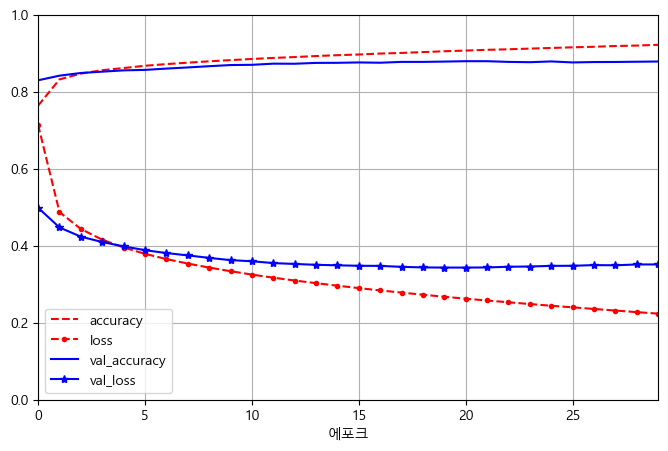

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='에포크',
    style=['r--', 'r--.', 'b-', 'b-*'])
plt.show()

In [67]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8709 - loss: 0.3703


[0.3650608956813812, 0.8733999729156494]

In [68]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.01, 0.  , 0.83],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [69]:
import numpy as np
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [70]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [71]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

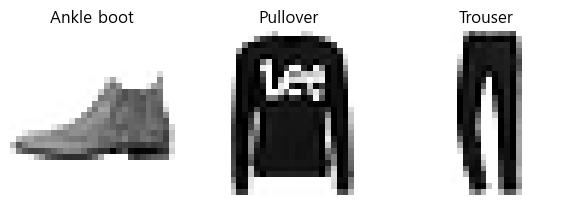

In [72]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [74]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.0981 - loss: 1.2828 - val_RootMeanSquaredError: 0.6079 - val_loss: 0.3695
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6219 - loss: 0.3870 - val_RootMeanSquaredError: 0.8982 - val_loss: 0.8068
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5960 - loss: 0.3554 - val_RootMeanSquaredError: 1.1631 - val_loss: 1.3528
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5851 - loss: 0.3425 - val_RootMeanSquaredError: 1.0551 - val_loss: 1.1133
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5749 - loss: 0.3306 - val_RootMeanSquaredError: 1.0407 - val_loss: 1.0831
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5691 - loss: 0.3239 - val_RootMeanSquaredError: 1.1444 - val_loss: 1.3097
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5637 - los

In [75]:
rmse_test

0.5331774353981018

In [76]:
y_pred

array([[0.4898171],
       [1.1896651],
       [5.1634088]], dtype=float32)

In [77]:
# 추가 코드 - 이름 카운터를 재설정하고 코드를 재현 가능하도록 설정.
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [78]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [79]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 8)                 │              17 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 30)                │             270 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 30)                │             930 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 38)                │               0 │ normalization[0][0],       │
│                               │                           │                 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              39 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [80]:
tf.random.set_seed(42)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.6711 - loss: 2.9629 - val_RootMeanSquaredError: 1.0200 - val_loss: 1.0405
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7389 - loss: 0.5475 - val_RootMeanSquaredError: 1.0665 - val_loss: 1.1374
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6590 - loss: 0.4346 - val_RootMeanSquaredError: 1.1971 - val_loss: 1.4330
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6352 - loss: 0.4036 - val_RootMeanSquaredError: 1.0340 - val_loss: 1.0691
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6206 - loss: 0.3853 - val_RootMeanSquaredError: 1.3172 - val_loss: 1.7351
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6114 - loss: 0.3739 - val_RootMeanSquaredError: 1.1816 - val_loss: 1.3961
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6036 - los

In [81]:
tf.random.set_seed(42)
input_wide = tf.keras.layers.Input(shape=[5]) # 특성 인덱스 0~4
input_deep = tf.keras.layers.Input(shape=[6]) # 특성 인덱스 2~7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [82]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.4827 - loss: 2.3240 - val_RootMeanSquaredError: 0.9140 - val_loss: 0.8354
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7296 - loss: 0.5328 - val_RootMeanSquaredError: 0.8714 - val_loss: 0.7593
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6707 - loss: 0.4502 - val_RootMeanSquaredError: 0.8047 - val_loss: 0.6475
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6513 - loss: 0.4244 - val_RootMeanSquaredError: 1.1531 - val_loss: 1.3296
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6420 - loss: 0.4123 - val_RootMeanSquaredError: 1.1105 - val_loss: 1.2332
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6343 - loss: 0.4024 - val_RootMeanSquaredError: 1.2695 - val_loss: 1.6115
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6275 - los

In [83]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [84]:
input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [85]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [86]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - dense_2_RootMeanSquaredError: 1.4253 - dense_2_loss: 1.9308 - dense_3_RootMeanSquaredError: 1.7456 - dense_3_loss: 0.3148 - loss: 2.2456 - val_dense_2_RootMeanSquaredError: 0.8431 - val_dense_2_loss: 0.6395 - val_dense_3_RootMeanSquaredError: 1.8776 - val_dense_3_loss: 0.3524 - val_loss: 0.9922
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_2_RootMeanSquaredError: 0.6946 - dense_2_loss: 0.4349 - dense_3_RootMeanSquaredError: 0.8642 - dense_3_loss: 0.0748 - loss: 0.5096 - val_dense_2_RootMeanSquaredError: 0.7859 - val_dense_2_loss: 0.5557 - val_dense_3_RootMeanSquaredError: 1.1807 - val_dense_3_loss: 0.1394 - val_loss: 0.6953
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_2_RootMeanSquaredError: 0.6578 - dense_2_loss: 0.3897 - dense_3_RootMeanSquaredError: 0.7826 - dense_3_loss: 0.0613 - loss: 0.4509 - val_dense_2_RootMeanSquaredError: 1.1549 - val_dense_2_loss: 1.2000 - val_dense_3_RootMeanSquaredError: 0.8

In [87]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=True)
weighted_sum_of_losses, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - dense_2_RootMeanSquaredError: 0.5840 - dense_2_loss: 0.3071 - dense_3_RootMeanSquaredError: 0.6326 - dense_3_loss: 0.0400 - loss: 0.3471


ValueError: too many values to unpack (expected 3)

In [88]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [89]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [90]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [91]:
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # 모델에 이름 부여 위해 필요
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

# 모델 인스턴스 생성 및 컴파일
model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

In [92]:
tf.random.set_seed(42)  # 추가 코드 - 재현성을 위한 것

In [93]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

# Normalization 레이어 학습
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

# 모델 훈련
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

# 모델 평가
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_rmse, main_rmse, aux_rmse = eval_results

# 예측
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 1.5598 - RootMeanSquaredError_1: 1.8859 - loss: 2.6310 - mse_loss: 0.3667 - val_RootMeanSquaredError: 1.1197 - val_RootMeanSquaredError_1: 1.3657 - val_loss: 1.3148 - val_mse_loss: 0.1865
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8284 - RootMeanSquaredError_1: 0.8982 - loss: 0.6989 - mse_loss: 0.0808 - val_RootMeanSquaredError: 0.9968 - val_RootMeanSquaredError_1: 0.7822 - val_loss: 0.9554 - val_mse_loss: 0.0612
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7343 - RootMeanSquaredError_1: 0.7834 - loss: 0.5469 - mse_loss: 0.0614 - val_RootMeanSquaredError: 1.1023 - val_RootMeanSquaredError_1: 0.9099 - val_loss: 1.1764 - val_mse_loss: 0.0828
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6770 - RootMeanSquaredError_1: 0.7347 - loss: 0.4666 - mse_loss: 0.0540 - val_RootMeanSquaredError: 0.8960 - val_RootMeanSquaredEr

ValueError: too many values to unpack (expected 4)

In [94]:
model.summary()

Model: "my_cool_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (11610, 5)                  │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_1 (Normalization)      │ (11610, 6)                  │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,647 (14.26 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,416 (9.44 KB)

In [95]:
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [96]:
# 모델 저장
model.save("my_keras_model.keras")

In [97]:
# 모델 로드
model = tf.keras.models.load_model("my_keras_model.keras")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [98]:
model.save_weights("my_weights.weights.h5")

In [99]:
model.load_weights("my_weights.weights.h5")

In [100]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 0.5906 - RootMeanSquaredError_1: 0.6383 - loss: 0.3547 - mse_loss: 0.0408 - val_RootMeanSquaredError: 0.9963 - val_RootMeanSquaredError_1: 1.0436 - val_loss: 1.0023 - val_mse_loss: 0.1089
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5839 - RootMeanSquaredError_1: 0.6323 - loss: 0.3469 - mse_loss: 0.0400 - val_RootMeanSquaredError: 0.7302 - val_RootMeanSquaredError_1: 0.6615 - val_loss: 0.5236 - val_mse_loss: 0.0438
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5820 - RootMeanSquaredError_1: 0.6306 - loss: 0.3447 - mse_loss: 0.0398 - val_RootMeanSquaredError: 0.7480 - val_RootMeanSquaredError_1: 0.8261 - val_loss: 0.5718 - val_mse_loss: 0.0682
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5782 - RootMeanSquaredError_1: 0.6265 - loss: 0.3402 - mse_loss: 0.0393 - val_RootMeanSquaredError: 0.7108 - val_RootMeanSquaredEr

In [101]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5697 - RootMeanSquaredError_1: 0.6170 - loss: 0.3302 - mse_loss: 0.0381 - val_RootMeanSquaredError: 0.9311 - val_RootMeanSquaredError_1: 0.9924 - val_loss: 0.8787 - val_mse_loss: 0.0984
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5680 - RootMeanSquaredError_1: 0.6159 - loss: 0.3283 - mse_loss: 0.0379 - val_RootMeanSquaredError: 0.8626 - val_RootMeanSquaredError_1: 0.7298 - val_loss: 0.7229 - val_mse_loss: 0.0533
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5669 - RootMeanSquaredError_1: 0.6133 - loss: 0.3269 - mse_loss: 0.0376 - val_RootMeanSquaredError: 1.0006 - val_RootMeanSquaredError_1: 0.8720 - val_loss: 0.9771 - val_mse_loss: 0.0760
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5653 - RootMeanSquaredError_1: 0.6106 - loss: 0.3249 - mse_loss: 0.0373 - val_RootMeanSquaredError: 0.9403 - val_RootMeanSquar

In [102]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, eopch, logs):
        ratio = logs['val_loss'] / logs['loss']
        print(f'Epoch={epoch}, val/train={ratio:.2f}')

In [103]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='my_logs'):
    return Path(root_logdir) / strftime('run_%Y_%m_%d_%H_%M_%S')

run_logdir = get_run_logdir()

In [104]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5613 - RootMeanSquaredError_1: 0.6080 - loss: 0.3206 - mse_loss: 0.0370 - val_RootMeanSquaredError: 0.7013 - val_RootMeanSquaredError_1: 0.7590 - val_loss: 0.5002 - val_mse_loss: 0.0576
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5599 - RootMeanSquaredError_1: 0.6049 - loss: 0.3188 - mse_loss: 0.0366 - val_RootMeanSquaredError: 0.8672 - val_RootMeanSquaredError_1: 0.6848 - val_loss: 0.7237 - val_mse_loss: 0.0469
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5599 - RootMeanSquaredError_1: 0.6044 - loss: 0.3187 - mse_loss: 0.0365 - val_RootMeanSquaredError: 0.9669 - val_RootMeanSquaredError_1: 1.0584 - val_loss: 0.9535 - val_mse_loss: 0.1120
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5593 - RootMeanSquaredError_1: 0.6043 - loss: 0.3181 - mse_loss: 0.0365 - val_RootMeanSquaredError: 1.0402 - val_RootMeanSquaredEr

In [105]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2024_11_20_18_05_29
    plugins
      profile
        2024_11_20_09_07_29
          DESKTOP-R4CSED2.xplane.pb
        2024_11_20_09_08_24
          DESKTOP-R4CSED2.xplane.pb
    train
      events.out.tfevents.1732093648.DESKTOP-R4CSED2.9852.0.v2
      events.out.tfevents.1732093703.DESKTOP-R4CSED2.9852.2.v2
    validation
      events.out.tfevents.1732093649.DESKTOP-R4CSED2.9852.1.v2
      events.out.tfevents.1732093704.DESKTOP-R4CSED2.9852.3.v2
  run_2024_11_20_18_28_00
    events.out.tfevents.1732094880.DESKTOP-R4CSED2.9852.4.v2
  run_2024_11_20_18_28_11
    events.out.tfevents.1732094891.DESKTOP-R4CSED2.9852.5.v2
  run_2024_11_20_18_28_33
    events.out.tfevents.1732094913.DESKTOP-R4CSED2.9852.6.v2
  run_2024_11_21_17_30_08
    plugins
      profile
        2024_11_21_08_30_09
          DESKTOP-R4CSED2.xplane.pb
    train
      events.out.tfevents.1732177808.DESKTOP-R4CSED2.15256.179.v2
    validation
      events.out.tfevents.1732177809.DESKTOP-R4CSED2.15256.180.v2


In [106]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

Reusing TensorBoard on port 6006 (pid 5064), started 23:16:17 ago. (Use '!kill 5064' to kill it.)

In [125]:
!kill 5064

kill: 5064: No such process


In [107]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 +1):
        tf.summary.scalar('my_scalar', np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100 # 점점 커짐
        tf.summary.histogram('my_hist', data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000 # 점점 밝아짐
        tf.summary.image('my_images', images, step=step)

        texts = ['The step is ' + str(step), 'Its squar is ' + str(step ** 2)]
        tf.summary.text('my_text', texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

In [108]:
import tensorflow as tf
from tensorflow import keras

In [109]:
!pip install -q -U keras-tuner
import kerastuner as kt

DEPRECATION: Loading egg at c:\users\niceq\anaconda3\lib\site-packages\huggingface_hub-0.24.7-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [111]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=256)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optmizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [112]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory='my_fasion_mnist', project_name='my_rnd_search', seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.8366000056266785

Best val_accuracy So Far: 0.86080002784729
Total elapsed time: 00h 02m 11s


In [113]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

print(top3_models)
print(best_model)

[<Sequential name=sequential, built=True>, <Sequential name=sequential, built=True>, <Sequential name=sequential, built=True>]
<Sequential name=sequential, built=True>


In [114]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
best_params = top3_params[0]  # 첫 번째 하이퍼파라미터 객체 가져오기
best_params.values  # 하이퍼파라미터 값을 딕셔너리 형태로 출력

{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [115]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.86080002784729


In [116]:
best_trial.metrics.get_last_value('val_accuracy')

0.86080002784729

In [117]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8726 - loss: 0.3538
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8775 - loss: 0.3388
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8788 - loss: 0.3337
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.3204
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8820 - loss: 0.3218
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8862 - loss: 0.3109
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8861 - loss: 0.3268
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8910 - loss: 0.3015
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8899 - loss: 0.3029
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8942 - loss: 0.2945
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.8602 - loss: 0.4059


In [118]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean('normalize'):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [119]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective='val_accuracy', seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory='my_fashion_mnist', project_name='hyperband')

In [120]:
from pathlib import Path
from time import strftime

root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 37s]
val_accuracy: 0.8119999766349792

Best val_accuracy So Far: 0.8705999851226807
Total elapsed time: 00h 18m 11s


In [127]:
print(f"TensorBoard 로그 디렉토리: {root_logdir}")

TensorBoard 로그 디렉토리: my_fashion_mnist\hyperband\tensorboard


In [121]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.8392000198364258

Best val_accuracy So Far: 0.8557999730110168
Total elapsed time: 00h 04m 04s


In [130]:
%tensorboard --logdir=my_fashion_mnist/hyperband/tensorboard

In [132]:
# Windows 환경에 적합한 명령어로 TensorBoard 프로세스 찾기
!tasklist | findstr tensorboard

tensorboard.exe              19608 Console                    8      3,752 K
tensorboard.exe              28152 Console                    8      3,720 K


In [133]:
!taskkill /PID 19608 /F
!taskkill /PID 28152 /F

성공: 프로세스(PID 19608)가 종료되었습니다.
성공: 프로세스(PID 28152)가 종료되었습니다.
